In [1]:
from anyBSM import anyBSM
import anyBSM.plotting as plotting
import numpy as np
import logging
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams['font.size'] = 19

# simple helpers to toggle debug output
def debugon():
    logging.getLogger('anyH3').setLevel(logging.DEBUG)
def debugoff():
    logging.getLogger('anyH3').setLevel(logging.INFO)
debugoff()

In [2]:
# init model in OS scheme
SM = anyBSM(
    'SM', # load the SM
    scheme_name = "OS", # load the OS scheme with FJ tadpoles
    progress = False, # dont show any progress bars
    quiet = True,
    caching = 2 # enable the cache
)

In [3]:
SM.SM_parameters # found SM parameters from "schemes.yml"-file

{'VEV': vvSM,
 'alphaQEDinverse': aEWM1,
 'alphaQCD': aS,
 'GFermi': GFermi,
 'Dalpha': Dalpha}

In [4]:
SM.SM_particles # found SM particles from "schemes.yml"-file

{'Higgs-Boson': h,
 'W-Boson': Wp,
 'Z-Boson': Z,
 'Photon': A,
 'Top-Quark': u3,
 'Bottom-Quark': d3,
 'Charm-Quark': u2,
 'Strange-Quark': d2,
 'Up-Quark': u1,
 'Down-Quark': d1,
 'Tau-Lepton': e3,
 'Muon-Lepton': e2,
 'Electron-Lepton': e1}

In [5]:
SM.scheme # scheme definition from "schemes.yml"-file

{'SM_names': {'Higgs-Boson': 'h'},
 'mass_counterterms': {'h': 'OS'},
 'VEV_counterterm': 'OS',
 'custom_counterterms': [],
 'parameter_counterterms': {}}

In [6]:
# lets vary the renormalization scale
def lambdahhhQ(Q):
    SM.setparameters(params={'Qren': Q})
    return list(SM.lambdahhh().values())

Qvals= np.linspace(start=10,stop=1000, num=50)

# first in the OS scheme
SM.load_renormalization_scheme('OS')
lamvals = np.array(list(map(lambdahhhQ,Qvals)))
# then in the MS scheme
SM.load_renormalization_scheme('MS')
lamvalsMS = np.array(list(map(lambdahhhQ,Qvals)))

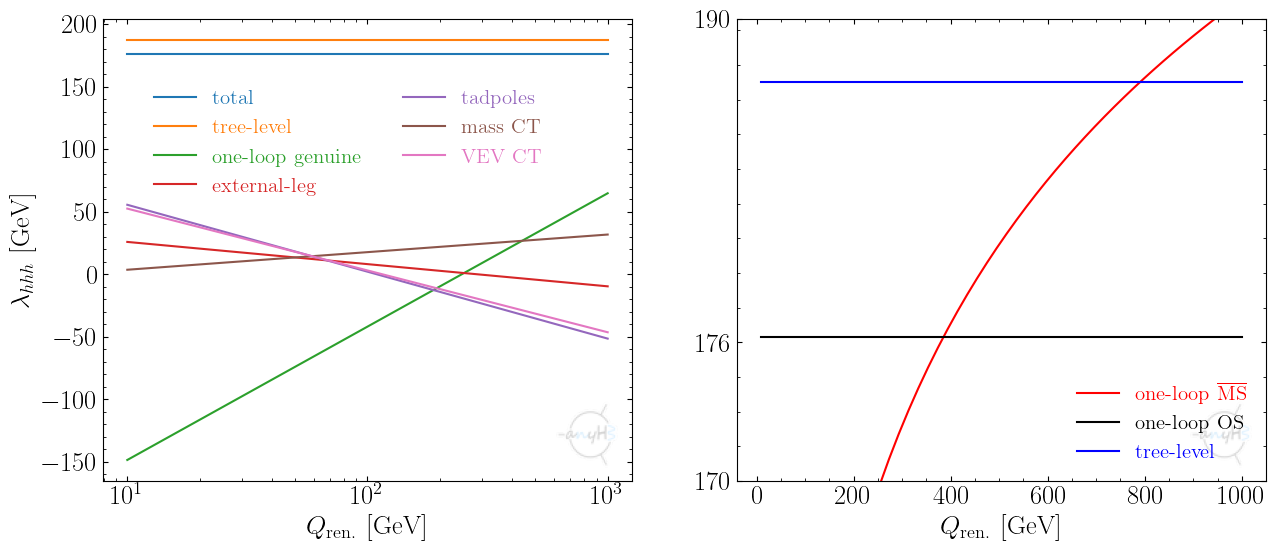

In [7]:
plotting.anyLogo['resize'] = 50
plotting.anyLogo['alpha'] = 0.2
labels = {0: 'total', 1: 'tree-level', 2: 'one-loop genuine', 3: 'external-leg', 4: 'tadpoles', 5: 'mass CT', 6: 'VEV CT'}
fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(15,6))
for i in range(7):
    ax[0].plot(Qvals,lamvals.transpose()[i].real, label = labels[i])
ax[0].set_xlabel(r'$Q_{\text{ren.}}\,\,\text{[GeV]}$')
ax[0].set_ylabel(r'$\lambda_{hhh}\,\,\text{[GeV]}$')
# ax.axes.axhline(lambda0.real, color='green',label="tree-level")
ax[0].set_xscale('log')
ax[0].legend(**{'loc': [0.08, 0.6], 'fontsize': 15, 'fancybox': False, 'ncol': 2, 'frameon': False, 'labelcolor': 'linecolor'})
ax[1].plot(Qvals, lamvalsMS.transpose()[0].real, label = r'one-loop $\overline{\text{MS}}$',color='red')
ax[1].plot(Qvals, lamvals.transpose()[0].real, label = 'one-loop OS',color='black')
ax[1].plot(Qvals, lamvals.transpose()[1].real, label = 'tree-level',color='blue')
ax[1].set_ylim((170,190))
ax[1].legend(**{'loc': 'best', 'fontsize': 15, 'fancybox': False, 'ncol': 1, 'frameon': False, 'labelcolor': 'linecolor'})
ax[1].set_xlabel(r'$Q_{\text{ren.}}\,\,\text{[GeV]}$')
ax[1].set_yticks([170,176.00256611, 190], labels=['$170$','$176$', '$190$'])

In [8]:
lamvals.transpose()[0]  # cancellation is OS scheme is numerically very stable

array([176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j, 176.22855629+0.j, 176.22855629+0.j,
       176.22855629+0.j,

In [9]:
# example plot for MW prediction
SM.warnSSSS = False
SM.caching = 2
def calcMW(mh):
    SM.setparameters({'Mh':mh})
    return SM.MW()
MWvals = np.array(list(map(calcMW,Qvals)))

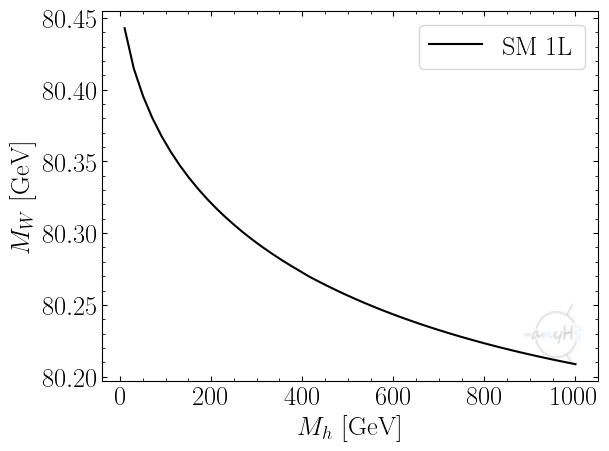

In [10]:
plt.plot(Qvals,MWvals, color='black',label='SM 1L')
plt.xlabel('$M_h$ [GeV]')
plt.ylabel('$M_W$ [GeV]')
plt.legend()

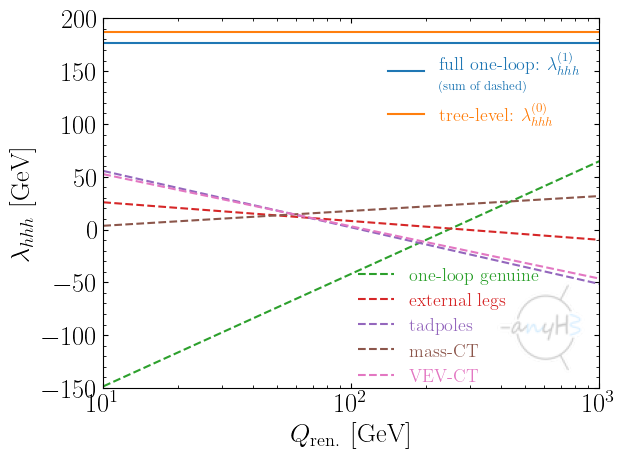

In [87]:
# single plot 
plotting.anyLogo['resize'] = 70
labels = {0: r'full one-loop: $\lambda_{hhh}^{\rm (1)}$' + '\n {\\small (sum of dashed)}',
          1: r'tree-level: $\lambda_{hhh}^{\rm (0)}$',
          2: 'one-loop genuine',
          3: 'external legs',
          4: 'tadpoles',
          5: 'mass-CT',
          6: 'VEV-CT'}
ps = []
for i in range(7):
    p, = plt.plot(Qvals,lamvals.transpose()[i].real, label = labels[i], ls = '-' if i <= 1 else '--')
    ps.append(p)
    
plt.xlabel(r'$Q_{\text{ren.}}\,\,\text{[GeV]}$')
plt.ylabel(r'$\lambda_{hhh}\,\,\text{[GeV]}$')
plt.margins(0,0)
plt.xscale('log')
plt.ylim(-150,200)
legend1= plt.legend(ps[:2], list(labels.values())[:2], loc = [0.56, 0.69], fontsize= 13, fancybox=False, ncol= 1, frameon= False, labelcolor = 'linecolor')
plt.gca().add_artist(legend1)
plt.legend(ps[2:], list(labels.values())[2:], loc = [0.499, -0.01], fontsize= 13, fancybox=False, ncol= 1, frameon= False, labelcolor = 'linecolor')

In [45]:
list(labels.values())[2:]

['one-loop genuine', 'external leg', 'tadpole-CT', 'mass-CT', 'VEV-CT']